In [10]:
import pandas as pd
import numpy as np
import os

In [11]:
image_folder = "batch_results/color"
images = []

# iterate through all files in the image folder and all its subfolders
for root, dirs, files in os.walk(image_folder):
    for file in files:
        if file.endswith(".png"):
            # get the full path of the image file
            image_path = os.path.join(root, file)
            # extract the image name without the extension
            image_name = os.path.splitext(file)[0]
            # add the image name and path to the list
            images.append((image_name, image_path))

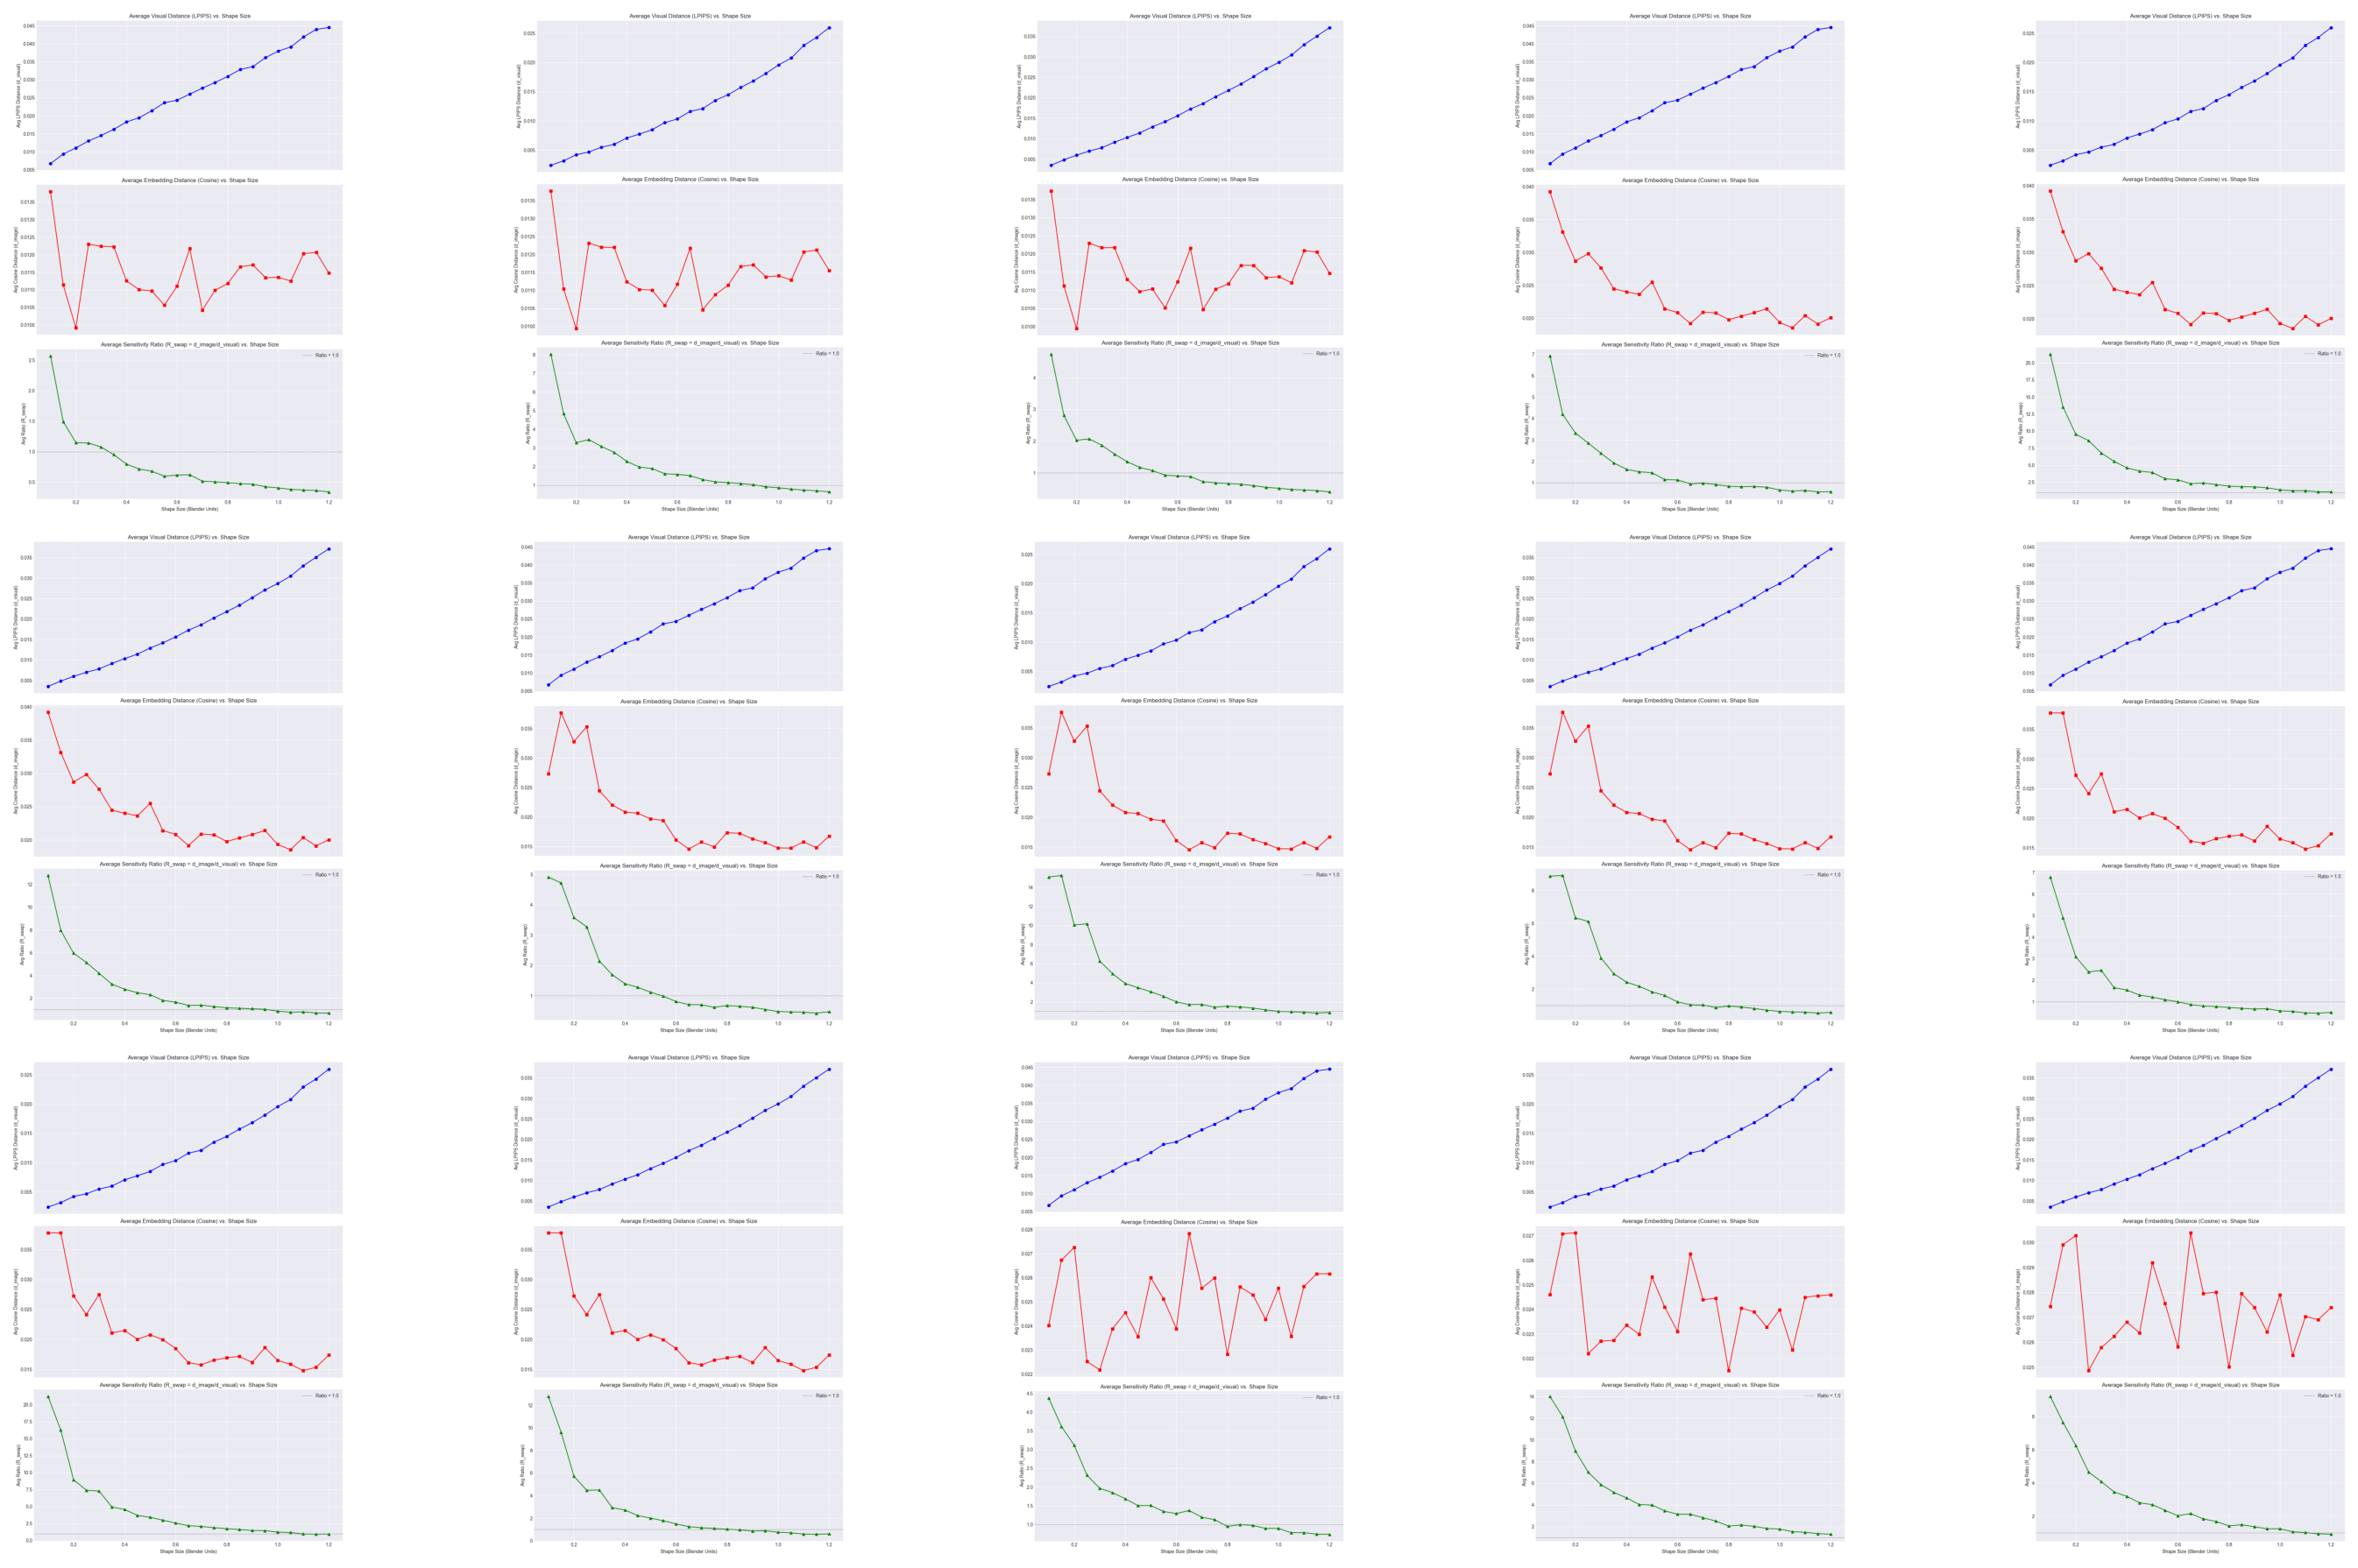

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Or use PIL, OpenCV etc. to load images

# Specify number of rows and columns
rows = 3
cols = 5

# --- Plotting Section ---

# Specify number of rows and columns
rows = 3
cols = 5
num_images_to_plot = min(len(images), rows * cols) # Ensure we don't exceed grid size or image count

# Create the figure and axes objects
# Adjust figsize for desired overall plot size (width, height in inches)
# Make figsize larger if images/titles overlap too much
fig, axes = plt.subplots(rows, cols, figsize=(30, 18))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the collected image tuples and plot them
for i, ax in enumerate(axes):
    if i < len(images): # Check if there's an image tuple for this subplot index
        image_name, image_path = images[i] # Unpack the tuple

        try:
            # --- Load the image using the path from the tuple ---
            img_data = mpimg.imread(image_path)
            # --- Image loaded ---

            ax.imshow(img_data)
            ax.axis('off') # Hide the axes ticks and labels

        except FileNotFoundError:
            print(f"Warning: Image file not found at {image_path}. Skipping.")
            ax.axis('off')
        except Exception as e:
            print(f"Warning: Could not load image {image_path}. Error: {e}")
            ax.axis('off')
    else:
        # Hide unused subplots if you have fewer than 15 images
        ax.axis('off')

# Adjust layout to prevent titles/images from overlapping
plt.tight_layout()
# Or use subplots_adjust for more control:
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.05, top=0.95, wspace=0.1, hspace=0.4)

# Display the plot
plt.show()

In [13]:
# save the images to results folder
fig.savefig("results/combined_images_color.png", dpi=300, bbox_inches='tight')